<a href="https://colab.research.google.com/github/uday862/amazon_ml_hackathon/blob/main/RNNIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [5]:
vocab_size = 10000
maxlen = 200  # limit each review to 200 words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000


In [6]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print("Training data shape:", X_train.shape)


Training data shape: (25000, 200)


In [7]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test, y_test)
)


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 198s 992ms/step - accuracy: 0.6562 - loss: 0.5982 - val_accuracy: 0.8410 - val_loss: 0.3708
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 196s 998ms/step - accuracy: 0.8962 - loss: 0.2671 - val_accuracy: 0.8719 - val_loss: 0.3137
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 196s 998ms/step - accuracy: 0.9324 - loss: 0.1822 - val_accuracy: 0.8614 - val_loss: 0.4014
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 195s 997ms/step - accuracy: 0.9527 - loss: 0.1299 - val_accuracy: 0.8562 - val_loss: 0.4311
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9711 - loss: 0.0852 - val_accuracy: 0.8532 - val_loss: 0.4192


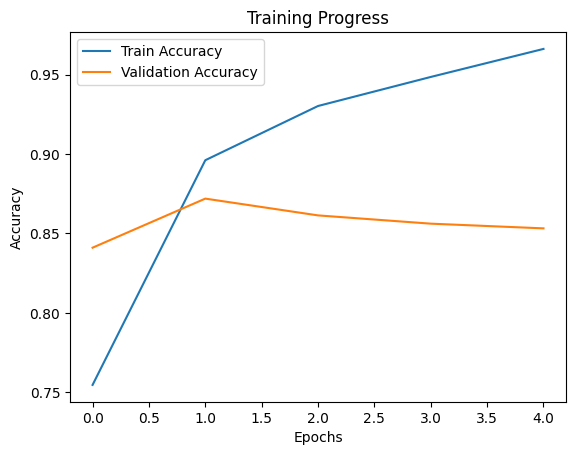

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.8544 - loss: 0.4268
Test Accuracy: 85.32%


In [12]:
word_index = imdb.get_word_index()

# Reverse lookup (index → word)
reverse_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_index.get(i - 3, '?') for i in encoded_review])

print("Example decoded review:")
print(decode_review(X_train[0]))


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Example decoded review:
and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it w

In [13]:
def encode_review(text):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 2) + 3 for word in tokens]  # 2 = unknown token
    return pad_sequences([encoded], maxlen=maxlen)

review = "The movie was absolutely fantastic and I loved every moment"
encoded = encode_review(review)
prediction = model.predict(encoded)
print("Positive" if prediction[0][0] > 0.5 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Positive


In [14]:
model.save("imdb_sentiment_model.h5")

# Later load it:
# from tensorflow.keras.models import load_model
# model = load_model("imdb_sentiment_model.h5")


In [15]:
print("First decoded training review:")
print(decode_review(X_train[0]))

print("\nFirst decoded testing review:")
print(decode_review(X_test[0]))

First decoded training review:
and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all t

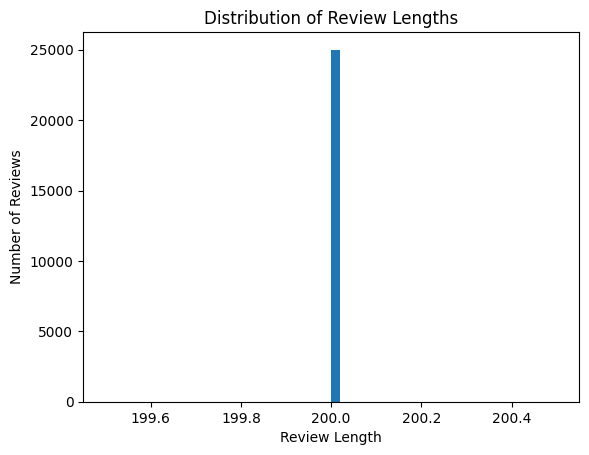

In [16]:
review_lengths = [len(x) for x in X_train]

plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()